1 - Improtando arquivos

In [16]:
import import_ipynb
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

2 - Lendo arquivos

In [17]:
turbina = pd.read_csv('T1.csv')
turbina.columns = ['Data/Hora', 'Poder Ativo(KW)', 'Velocidade Vento(m/s)', 'Curva Téorica(KWh)', 'Direção Vento(°)']
del turbina['Direção Vento(°)']
turbina['Data/Hora'] = pd.to_datetime(turbina['Data/Hora'], format='%d %m %Y %H:%M')
display(turbina)

,Data/Hora,Poder Ativo(KW),Velocidade Vento(m/s),Curva Téorica(KWh)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972
...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503


3 - Plotando os dados em um gráfico - Real

<Axes: xlabel='Velocidade Vento(m/s)', ylabel='Poder Ativo(KW)'>

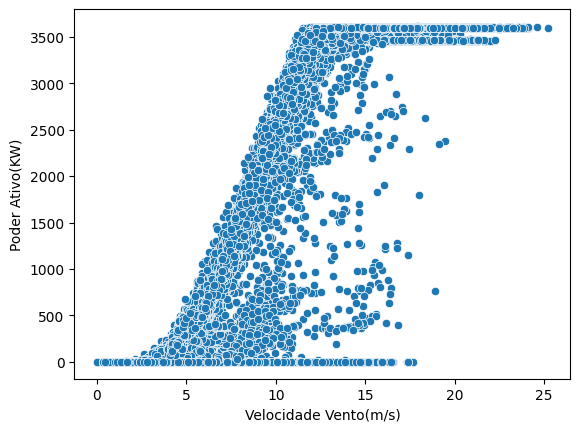

In [18]:
sns.scatterplot(data=turbina, x = 'Velocidade Vento(m/s)', y = 'Poder Ativo(KW)')

4 - Plotando os dados em um gráfico - Teórica

<Axes: xlabel='Velocidade Vento(m/s)', ylabel='Curva Téorica(KWh)'>

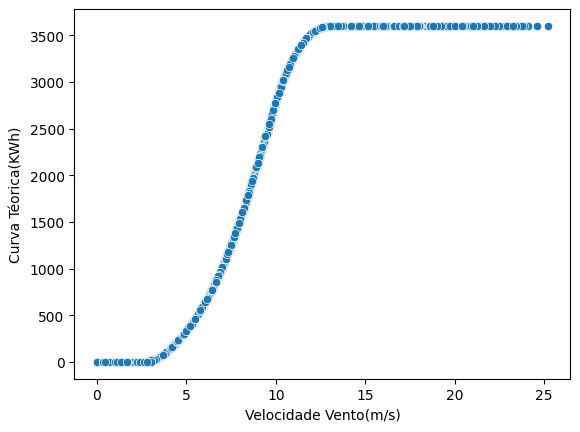

In [20]:
sns.scatterplot(data=turbina, x = 'Velocidade Vento(m/s)', y = 'Curva Téorica(KWh)')

5 - Criando "limites aceitáveis"

In [43]:
pot_real = turbina['Poder Ativo(KW)'].tolist()
pot_teorica = turbina['Curva Téorica(KWh)'].tolist()
pot_max = []
pot_min = []
dentro_limite = []

for potencia in pot_teorica:
    pot_max.append(potencia * 1.05)
    pot_min.append(potencia * 0.95)
    
for p, potencia in enumerate(pot_real):
    if potencia>=pot_min[p] and potencia<=pot_max[p]:
        dentro_limite.append('Dentro')
    elif potencia == 0:
        dentro_limite.append('Zero')
    else:
        dentro_limite.append('Fora')

print(f"Porcentagem Fora: {dentro_limite.count('Fora') / len(dentro_limite):.2%}")
print(f"Porcentagem Dentro: {dentro_limite.count('Dentro') / len(dentro_limite):.2%}")


Porcentagem Fora: 55.79%
Porcentagem Dentro: 37.29%


6 - Adicionando lista "dentro_limite" ao dataframe:

In [50]:
turbina['Dentro Limite'] = dentro_limite
display(turbina)

,Data/Hora,Poder Ativo(KW),Velocidade Vento(m/s),Curva Téorica(KWh),Dentro Limite
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,Fora
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,Fora
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,Fora
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,Fora
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,Fora
...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,Fora
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,Fora
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,Fora
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,Dentro


7 - Plotando nvoamente o gráfico com o dentro limite

<Axes: xlabel='Velocidade Vento(m/s)', ylabel='Poder Ativo(KW)'>

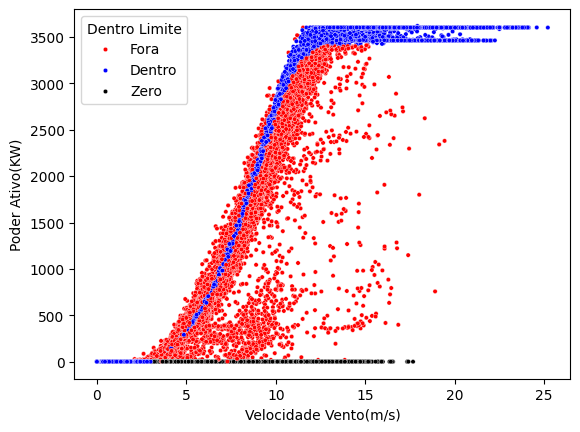

In [53]:
cores = {'Fora':'red', 'Dentro':'blue', 'Zero':'black'}
sns.scatterplot(data=turbina, x = 'Velocidade Vento(m/s)', y = 'Poder Ativo(KW)', hue = 'Dentro Limite', s=10, palette=cores)